<a href="https://colab.research.google.com/github/mistu17/Banking-system/blob/main/Time_Series_Analysis_with_Crypto_currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    "vs_currency": "usd",
    "days": "365",
    "interval": "daily"
}
response = requests.get(url, params=params)
data = response.json()
timestamps = [entry[0] for entry in data["prices"]]
prices = [entry[1] for entry in data["prices"]]
df = pd.DataFrame({"Date": pd.to_datetime(timestamps, unit="ms"), "Price": prices})
df.set_index("Date", inplace=True)
print(df.head())
df.to_csv("bitcoin_prices.csv")

                   Price
Date                    
2024-05-21  71430.297002
2024-05-22  70189.835818
2024-05-23  69181.200857
2024-05-24  67906.465343
2024-05-25  68539.916466


Text(0.5, 1.0, 'Bitcoin Price Trend (Last 1 Year)')

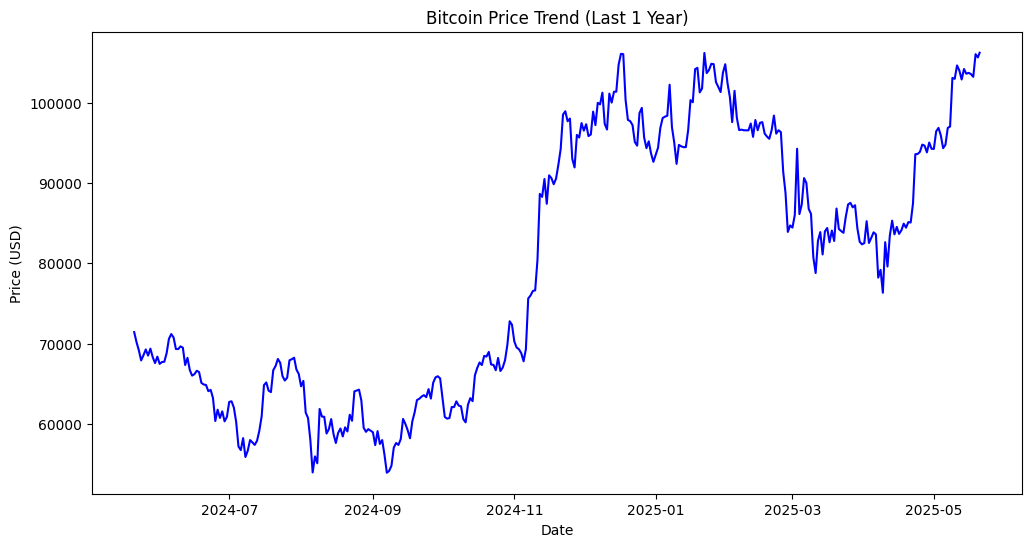

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Bitcoin Price (USD)", color="blue")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Trend (Last 1 Year)")


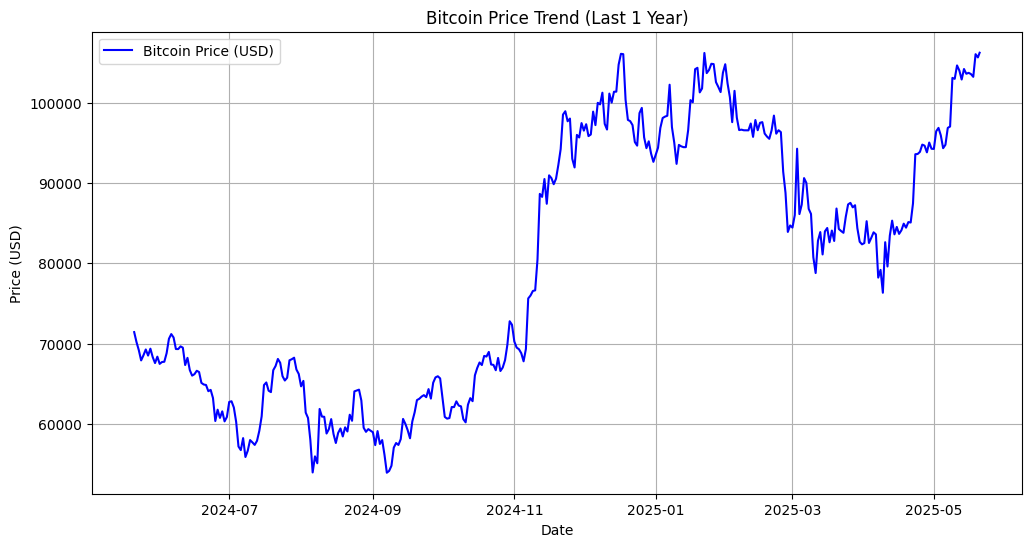

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Bitcoin Price (USD)", color="blue")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Trend (Last 1 Year)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
!pip install statsmodels tensorflow keras prophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("/content/bitcoin_prices.csv", parse_dates=['Date'], index_col='Date')
print(df.head())

                   Price
Date                    
2024-05-21  71430.297002
2024-05-22  70189.835818
2024-05-23  69181.200857
2024-05-24  67906.465343
2024-05-25  68539.916466


In [ ]:
#Train ARIMA Model
model_arima = ARIMA(df['Price'], order=(5,1,0))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

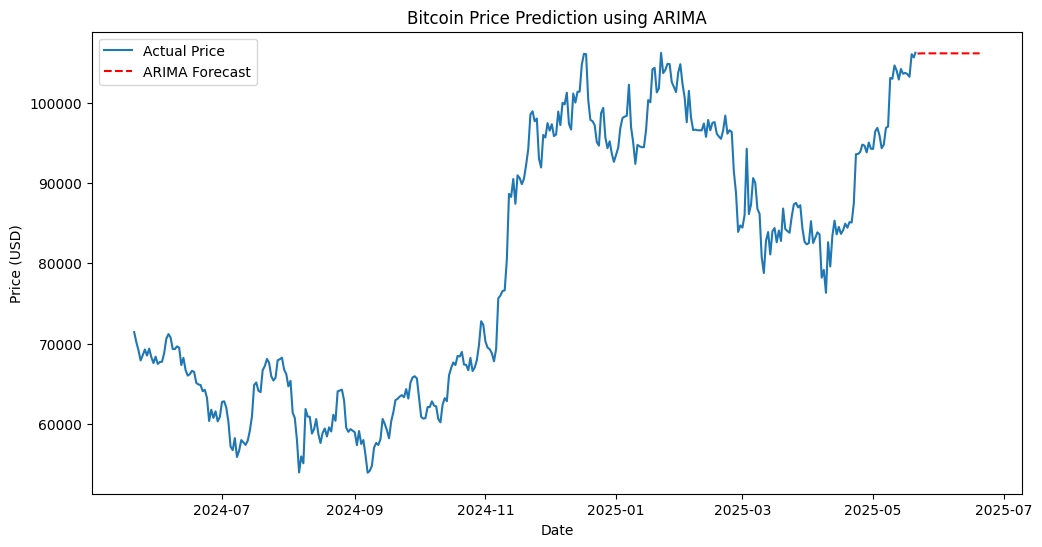

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Actual Price")
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq="D")[1:], forecast_arima, label="ARIMA Forecast", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Prediction using ARIMA")
plt.legend()
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Price"].values.reshape(-1,1))
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
time_step = 60
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [ ]:
#Build and train LSTM Model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_lstm.compile(optimizer="adam", loss="mean_squared_error")
model_lstm.fit(X_train, Y_train, batch_size=1, epochs=10)


Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.0447
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.0088
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0062
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0058
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0041
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 0.0042
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0046
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0033
Epoch 9/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0033
Epoch 10/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0031


In [ ]:
#forecast with LSTM predict last 30 days
X_input = scaled_data[-time_step:].reshape(1, time_step, 1)
lstm_predictions = []

for _ in range(30):
    pred = model_lstm.predict(X_input)
    lstm_predictions.append(pred[0,0])
    X_input = np.append(X_input[:,1:,:], pred.reshape(1,1,1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━

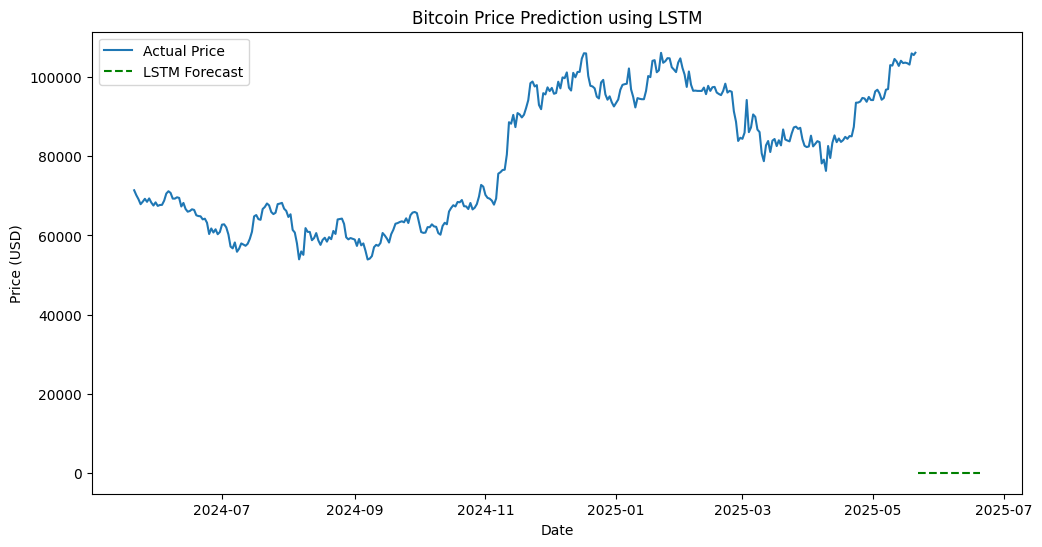

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Actual Price")
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq="D")[1:], lstm_predictions, label="LSTM Forecast", linestyle="dashed", color="green")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Prediction using LSTM")
plt.legend()
plt.show()

In [ ]:
#Forecasting with facebook prophet
#prepare data for prophet
df_prophet = df.reset_index()[['Date', 'Price']]
df_prophet.columns = ['ds', 'y']

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6jj2dtmf/3zhvx3jr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6jj2dtmf/ma56ze8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25300', 'data', 'file=/tmp/tmp6jj2dtmf/3zhvx3jr.json', 'init=/tmp/tmp6jj2dtmf/ma56ze8_.json', 'output', 'file=/tmp/tmp6jj2dtmf/prophet_modelbclmsmpp/prophet_model-20250520180144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:01:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:01:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


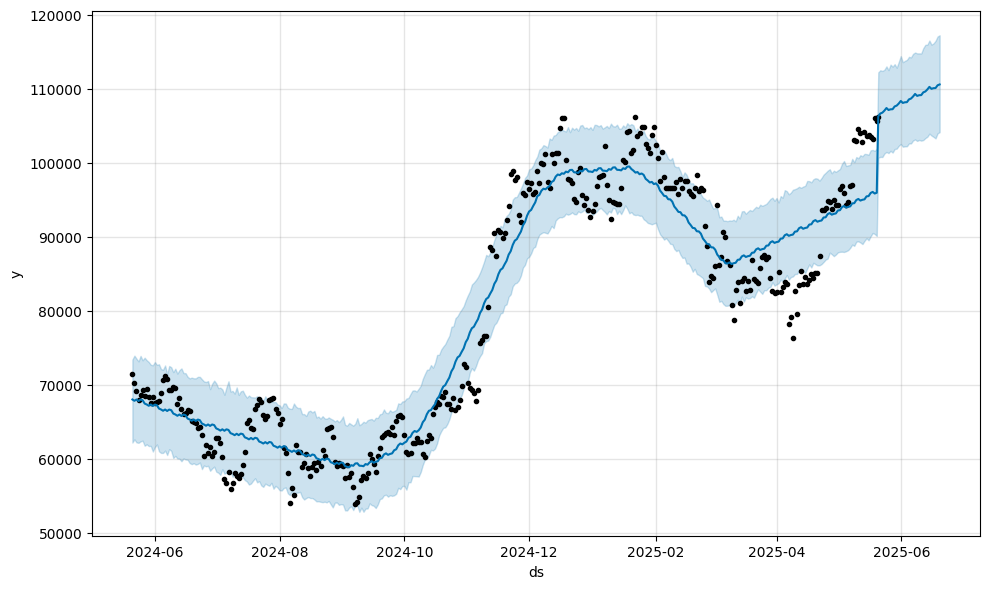

In [ ]:
#train prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)
model_prophet.plot(forecast)
plt.show()

In [ ]:
#Evaluate Model Performance
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
arima_rmse = np.sqrt(mean_squared_error(df['Price'][-30:], forecast_arima))
print(f"ARIMA RMSE: {arima_rmse}")

ARIMA RMSE: 8986.708244507885


In [ ]:
lstm_rmse = np.sqrt(mean_squared_error(df['Price'][-30:], lstm_predictions))
print(f"LSTM RMSE: {lstm_rmse}")

LSTM RMSE: 98831.86554221773


In [ ]:
prophet_rmse = np.sqrt(mean_squared_error(df['Price'][-30:].values, forecast['yhat'][-30:].values))
print(f"Prophet RMSE: {prophet_rmse}")

Prophet RMSE: 10713.26819777978


In [ ]:
import time
import requests

# Set the number of iterations you want the loop to run for
max_iterations = 5  # For example, stop after 10 iterations

for i in range(max_iterations):
    response = requests.get("https://api.coingecko.com/api/v3/simple/price", params={"ids": "bitcoin", "vs_currencies": "usd"})

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        btc_price = response.json()["bitcoin"]["usd"]
        print(f"Live Bitcoin Price: ${btc_price}")  # This line prints the price
    else:
        print(f"Error fetching price: Status code {response.status_code}") # This line prints an error

    time.sleep(10)  # Wait 10 seconds before fetching again to avoid rate limiting

print("Loop finished.")

Live Bitcoin Price: $106248
Live Bitcoin Price: $106248
Live Bitcoin Price: $106248
Live Bitcoin Price: $106248
Live Bitcoin Price: $106248
Loop finished.


In [ ]:
#Deploy as a webapp in streamlit
!pip install streamlit
import streamlit as st

st.title("Bitcoin Price Forecasting")

# Show actual price chart
st.line_chart(df['Price'])

# Show ARIMA forecast
st.line_chart(forecast_arima)

# Show LSTM forecast
st.line_chart(lstm_predictions)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00


2025-05-20 18:12:23.476 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:12:23.728 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-20 18:12:23.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:12:24.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:12:24.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:12:24.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:12:24.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:12:24.895 Thread 'MainThread': mi

DeltaGenerator()

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

Writing app.py


Index(['SNo', 'Name', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap'],
      dtype='object')


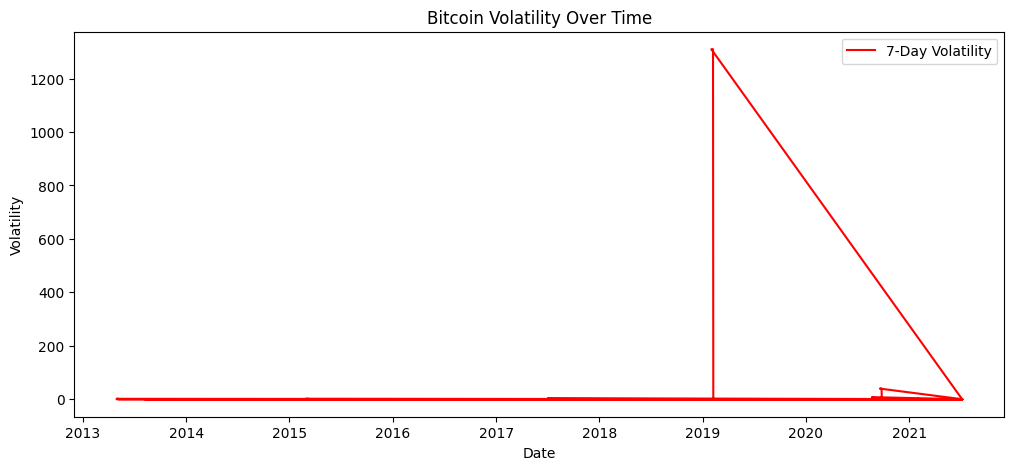

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Bitcoin Price Data using read_excel for .xlsx files
df = pd.read_excel("/content/Cryptocurrency Data.xlsx", parse_dates=["Date"], index_col="Date")

# --- Diagnosis Step ---
# Print the column names to identify the correct price column
print(df.columns)
# --- End Diagnosis Step ---

# Calculate 7-day rolling volatility
# Replace 'Price' with the actual column name from your Excel file that contains the price data.
# Assuming the price column is named 'Close', change df["Price"] to df["Close"]
# If the output of df.columns shows a different name for the price column, use that name instead of 'Close'.
df["Volatility"] = df["Close"].pct_change().rolling(7).std()

# Plot Volatility
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Volatility"], color="red", label="7-Day Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Bitcoin Volatility Over Time")
plt.legend()
plt.show()